In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [34]:
soil_type_saturation = np.array((0.364, 0.445, 0.455, 0.475, 0.507, 0.863))

In [35]:
invariant = xr.open_dataset('ICON_EU_invariant.nc')

In [58]:
lsm =  invariant['lsm'].squeeze()
soil_type = invariant['SOILTYP'].squeeze().astype("int")

In [61]:
saturation  = soil_type.where((soil_type==1)|(soil_type==2)|(soil_type==4)|(soil_type==5)
                |(soil_type==6)|(soil_type==7)|(soil_type==8)|(soil_type==9),soil_type_saturation[0])

saturation  = saturation.where((soil_type==1)|(soil_type==2)|(soil_type==3)|(soil_type==5)
                |(soil_type==6)|(soil_type==7)|(soil_type==8)|(soil_type==9),soil_type_saturation[1])

saturation  = saturation.where((soil_type==1)|(soil_type==2)|(soil_type==3)|(soil_type==4)
                |(soil_type==6)|(soil_type==7)|(soil_type==8)|(soil_type==9),soil_type_saturation[2])

saturation  = saturation.where((soil_type==1)|(soil_type==2)|(soil_type==3)|(soil_type==4)
                |(soil_type==5)|(soil_type==7)|(soil_type==8)|(soil_type==9),soil_type_saturation[3])

saturation  = saturation.where((soil_type==1)|(soil_type==2)|(soil_type==3)|(soil_type==4)
                |(soil_type==5)|(soil_type==6)|(soil_type==8)|(soil_type==9),soil_type_saturation[4])

saturation  = saturation.where((soil_type==1)|(soil_type==2)|(soil_type==3)|(soil_type==4)
                |(soil_type==5)|(soil_type==6)|(soil_type==7)|(soil_type==9),soil_type_saturation[5])

saturation  = saturation.where((soil_type==3)|(soil_type==4)
                |(soil_type==5)|(soil_type==6)|(soil_type==7)|(soil_type==8)|(soil_type==9), 0.)

saturation  = saturation.where((soil_type==1)|(soil_type==2)|(soil_type==3)|(soil_type==4)
                |(soil_type==5)|(soil_type==6)|(soil_type==7)|(soil_type==8))

saturation.name = 'soil_saturation'

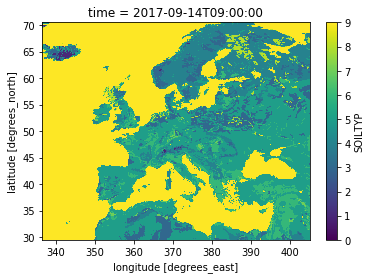

In [60]:
soil_type.plot()

In [62]:
saturation.to_netcdf('soil_saturation.nc')

In [6]:
saturation = xr.open_dataset('soil_saturation.nc')['soil_saturation']
saturation.values

array([[  nan,   nan,   nan, ..., 0.455, 0.455, 0.455],
       [  nan,   nan,   nan, ..., 0.455, 0.455, 0.455],
       [  nan,   nan,   nan, ..., 0.455, 0.455, 0.455],
       ...,
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [0.455, 0.455, 0.455, ...,   nan,   nan,   nan]], dtype=float32)

In [7]:
dset = xr.open_dataset('/scratch/local1/m300382/icon_forecasts/ICON_2019031812_eur.nc')

In [8]:
# Convert to normal soil moisture units
depths = dset['W_SO'].depth.values
depths[0]=depths[0]*2
rho_w=1000. 

w_so = dset['W_SO'].copy() # Otherwise it overwrites it

for i, depth in enumerate(depths):
    w_so[:,i,:,:] = dset['W_SO'][:,i,:,:]/(depth*rho_w)

In [29]:
# Expand the saturation matrix to have 
saturation = np.repeat(saturation.values[None,:,:], w_so.depth.shape[0], axis=0)
saturation = np.repeat(saturation[None,:,:,:], w_so.time.shape[0], axis=0)

In [30]:
w_so_sat = (w_so / saturation)*100.
w_so_sat.where()

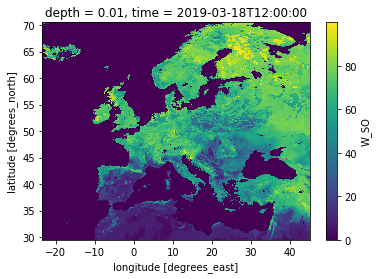

In [50]:
w_so_sat.where(w_so!=0,0.)[0,0].plot()

In [45]:
w_so_sat[0,0].min()

<xarray.DataArray 'W_SO' ()>
array(3.299923, dtype=float32)
Coordinates:
    depth    float64 0.01
    time     datetime64[ns] 2019-03-18T12:00:00